In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
%matplotlib agg

1. Read `lesmis.gml` file and use NetworkX to display the corresponding network, suggest appropriate simple labelling of the nodes to maintain the readability of the network graph as clear as possible. Save the adjacency matrix of this graph in a separate file.

In [7]:
# Load and display the network
G = nx.read_gml("lesmis.gml")
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=100, font_size=8)
plt.title("Les Miserables Character Network")
#plt.show()
plt.savefig('RawLesMisNetwork.png')

# Save adjacency matrix
adjacency_matrix = nx.to_numpy_array(G)
np.savetxt("adjacency_matrix.txt", adjacency_matrix, fmt='%d')

2.  Write a script that uses NetworkX functions to calculate the diameter, global clustering coefficient, average distance in the graph, smallest and largest component.

In [3]:
diameter = nx.diameter(G)
print(f"Diameter: {diameter}")
global_clustering_coefficient = nx.average_clustering(G)
print(f"Global Clustering Coefficient: {global_clustering_coefficient}")
average_distance = nx.average_shortest_path_length(G)
print(f"Average Distance: {average_distance}")
smallest_component = len(min(nx.connected_components(G), key=len))
print(f"Smallest Component: {smallest_component}")
largest_component = len(max(nx.connected_components(G), key=len))
print(f"Largest Component: {largest_component}")

Diameter: 5
Global Clustering Coefficient: 0.5731367499320134
Average Distance: 2.6411483253588517
Smallest Component: 77
Largest Component: 77


3. Suggest a script that uses NetworkX functions to identify the nodes (characters) of the three highest degree centrality, three highest closeness centrality and three highest betweenness centrality.  

In [4]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

degree_top3 = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
closeness_top3 = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
betweenness_top3 = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print(f"Top 3 Degree Centrality: {degree_top3}")
print(f"Top 3 Closeness Centrality: {closeness_top3}")
print(f"Top 3 Betweenness Centrality: {betweenness_top3}")

Top 3 Degree Centrality: [('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25)]
Top 3 Closeness Centrality: [('Valjean', 0.6440677966101694), ('Marius', 0.5314685314685315), ('Thenardier', 0.5170068027210885)]
Top 3 Betweenness Centrality: [('Valjean', 0.5699890527836184), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584766)]


4. Write a script that plots the degree centrality distribution, closeness centrality distribution and betweenness centrality distribution.

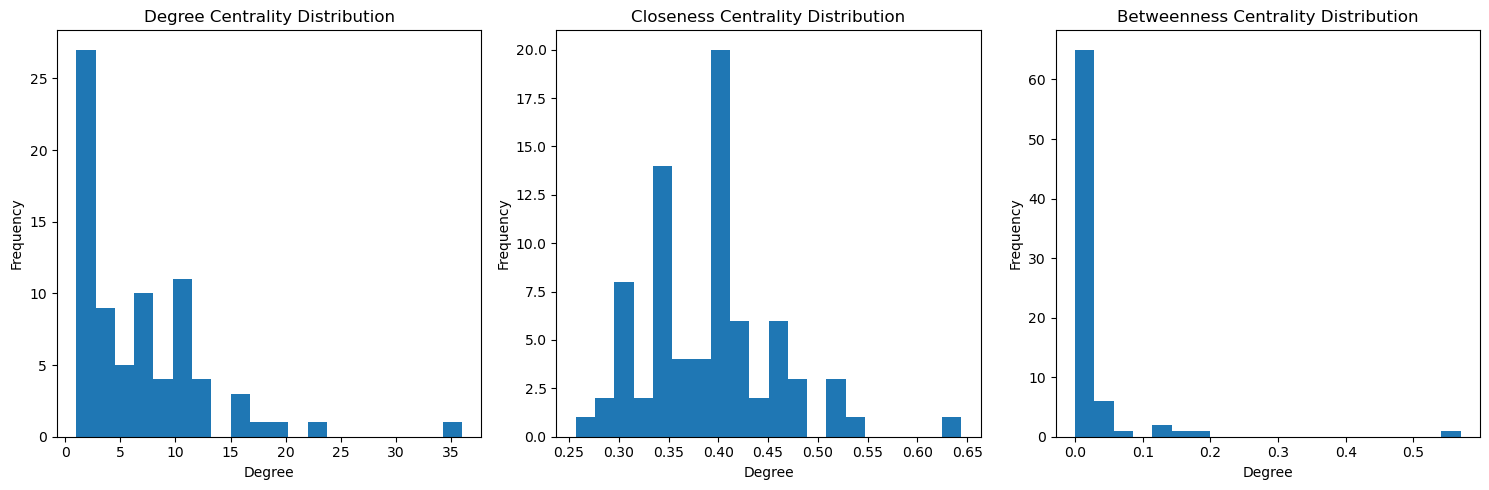

In [5]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
closeness_sequence = list(closeness_centrality.values())
betweenness_sequence = list(betweenness_centrality.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot degree centrality distribution
axs[0].hist(degree_sequence, bins=20)
axs[0].set_title("Degree Centrality Distribution")
axs[0].set_xlabel("Degree")
axs[0].set_ylabel("Frequency")
# Plot closeness centrality distribution
axs[1].hist(closeness_sequence, bins=20)
axs[1].set_title("Closeness Centrality Distribution")
axs[1].set_xlabel("Degree")
axs[1].set_ylabel("Frequency")
# Plot betweenness centrality distribution
axs[2].hist(betweenness_sequence, bins=20)
axs[2].set_title("Betweenness Centrality Distribution")
axs[2].set_xlabel("Degree")
axs[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

5. We want to test the extent to which the centrality distributions in 3) fit a power law distribution. You may inspire from the implementation in powerlaw · PyPI  of the power-law distribution, or can use alternative one of your choice. It is important to quantify the goodness of fit using p-value. Typically, when p-value is greater than 10%, we can state that power-law is a plausible fit to the (distribution) data. 

In [6]:
def fit_powerlaw(data):
    fit = powerlaw.Fit(data, discrete=True)
    return fit.distribution_compare('power_law', 'exponential')[1]
# Extract centrality values
degree_values_1 = list(degree_centrality.values())
closeness_values_1 = list(closeness_centrality.values())
betweenness_values_1 = list(betweenness_centrality.values())
# Calculate p-value for each centrality
degree_p1 = fit_powerlaw(degree_values_1)
closeness_p1 = fit_powerlaw(closeness_values_1)
betweenness_p1 = fit_powerlaw(betweenness_values_1)
# Check if p-value is greater than 10% for each centrality
if degree_p1 > 0.1:
    print("The power-law is a plausible fit to the degree centrality data")
else:
    print("The power-law is not a plausible fit to the degree centrality data")
if closeness_p1 > 0.1:
    print("The power-law is a plausible fit to the closeness centrality data")
else:
    print("The power-law is not a plausible fit to the closeness centrality data")
if betweenness_p1 > 0.1:
    print("The power-law is a plausible fit to the betweenness centrality data")
else:
    print("The power-law is not a plausible fit to the betweenness centrality data")

Calculating best minimal value for power law fit
C:\Users\Admin\miniconda3\envs\myenv\lib\site-packages\powerlaw.py:1146: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))


The power-law is a plausible fit to the degree centrality data
The power-law is not a plausible fit to the closeness centrality data
The power-law is not a plausible fit to the betweenness centrality data


C:\Users\Admin\miniconda3\envs\myenv\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
C:\Users\Admin\miniconda3\envs\myenv\lib\site-packages\powerlaw.py:1146: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


6. We want to use exponentially truncated power-law instead of power law distribution.
Suggest a script that quantifies the goodness of fit for degree-centrality, closeness centrality
and betweenness centrality distributions.

In [7]:
# Function to fit exponentially truncated power-law distribution and calculate p-value
def fit_exp_truncated_power_law(data):
    fit = powerlaw.Fit(data, discrete=True)
    return fit.truncated_power_law.parameter1, fit.truncated_power_law.parameter2, fit.distribution_compare('truncated_power_law', 'exponential')[1]

# Extract centrality values
degree_values = list(degree_centrality.values())
closeness_values = list(closeness_centrality.values())
betweenness_values = list(betweenness_centrality.values())

# Fit exponentially truncated power-law distribution and calculate p-value for each centrality
degree_alpha, degree_lambda, degree_p = fit_exp_truncated_power_law(degree_values)
closeness_alpha, closeness_lambda, closeness_p = fit_exp_truncated_power_law(closeness_values)
betweenness_alpha, betweenness_lambda, betweenness_p = fit_exp_truncated_power_law(betweenness_values)

# Check if p-value is greater than 10% for each centrality
if degree_p > 0.1:
    print("Degree centrality likely follows an exponentially truncated power-law distribution.")
else:
    print("Degree centrality does not follow an exponentially truncated power-law distribution.")

if closeness_p > 0.1:
    print("Closeness centrality likely follows an exponentially truncated power-law distribution.")
else:
    print("Closeness centrality does not follow an exponentially truncated power-law distribution.")

if betweenness_p > 0.1:
    print("Betweenness centrality likely follows an exponentially truncated power-law distribution.")
else:
    print("Betweenness centrality does not follow an exponentially truncated power-law distribution.")

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


Degree centrality likely follows an exponentially truncated power-law distribution.
Closeness centrality does not follow an exponentially truncated power-law distribution.
Betweenness centrality does not follow an exponentially truncated power-law distribution.


In [8]:
def community_visualization(graph, node_groups, graph_title):
    # Define a list of colors for communities
    colors = ['blue', 'green', 'red', 'yellow', 'purple', 'orange']
    # Create a color map to assign colors to nodes based on their communities
    color_map = {}
    for i, com in enumerate(node_groups):
        for node in com:
            color_map[node] = colors[i % len(colors)]
    # Calculate edge thickness based on community membership
    edge_width = {(u, v): 1 for u, v in graph.edges()}
    for i, com in enumerate(node_groups):
        for u, v in graph.edges():
            if u in com and v in com:
                edge_width[(u, v)] += 1
    # Draw the graph with colored nodes, edges, and community labels
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, seed=42)
    for i, com in enumerate(node_groups):
        nx.draw_networkx_nodes(graph, pos, nodelist=com, node_color=colors[i % len(colors)],
                               node_size=300, alpha=0.8, label=f"Community {i+1}")
    for (u, v), width in edge_width.items():
        nx.draw_networkx_edges(graph, pos, edgelist=[(u, v)], width=width, alpha=0.5)
    nx.draw_networkx_labels(graph, pos, font_size=10, font_color='black')
    plt.title(graph_title)
    plt.legend(loc='upper right')
    plt.axis('off')
    plt.show()

7. We want to identify relevant communities from the network graph. For this purpose, use Louvain algorithm implementation in NetworkX to identify the main communities. Write a script that uses different color for each community and visualize the above graph with the detected communities. Use the appropriate function in NetworkX to compute the separation among the various communities and any other related quality measures. 

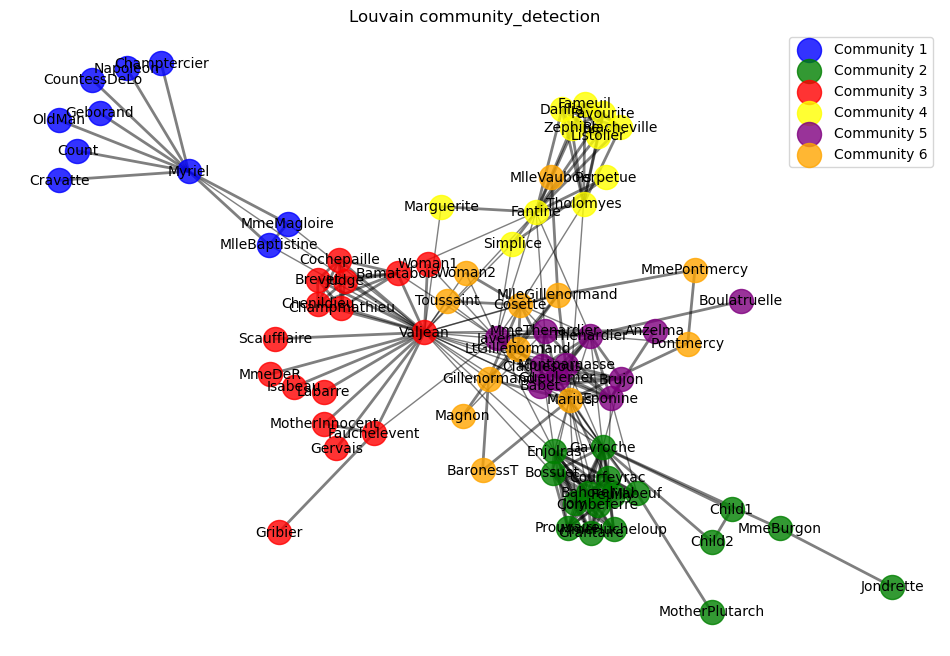

Louvain modularity: 0.56000837001674
Louvain performance: 0.8827751196172249


In [9]:
from networkx.algorithms import community
from community import community_louvain

partition = community_louvain.best_partition(G)
max_community = max(partition.values())
node_groups = [[] for _ in range(max_community + 1)]
for node, a_community in partition.items():
    node_groups[a_community].append(node)
community_visualization(G, node_groups, "Louvain community_detection")
louvain_modularity = community.modularity(G, node_groups)
print(f"Louvain modularity: {louvain_modularity}")
_, louvain_performance = community.partition_quality(G, node_groups)
print(f"Louvain performance: {louvain_performance}")

8. We want to ignore the weighting imposed by the network, and we want to restrict to binary
representation (either weight value 1 if there is cooccurrence of characters, zero otherwise).
Provide the new adjacency matrix and save it in a file.

Binary adjacency matrix saved to binary_adjacency_matrix.txt
Step 2
    Diameter: 5
    Global Clustering Coefficient: 0.5731367499320134
    Average Distance: 2.6411483253588517
    Smallest Component: 77
    Largest Component: 77
Step 3
    Top 3 Degree Centrality: [('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25)]
    Top 3 Closeness Centrality: [('Valjean', 0.6440677966101694), ('Marius', 0.5314685314685315), ('Thenardier', 0.5170068027210885)]
    Top 3 Betweenness Centrality: [('Valjean', 0.5699890527836184), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584766)]
Step 4


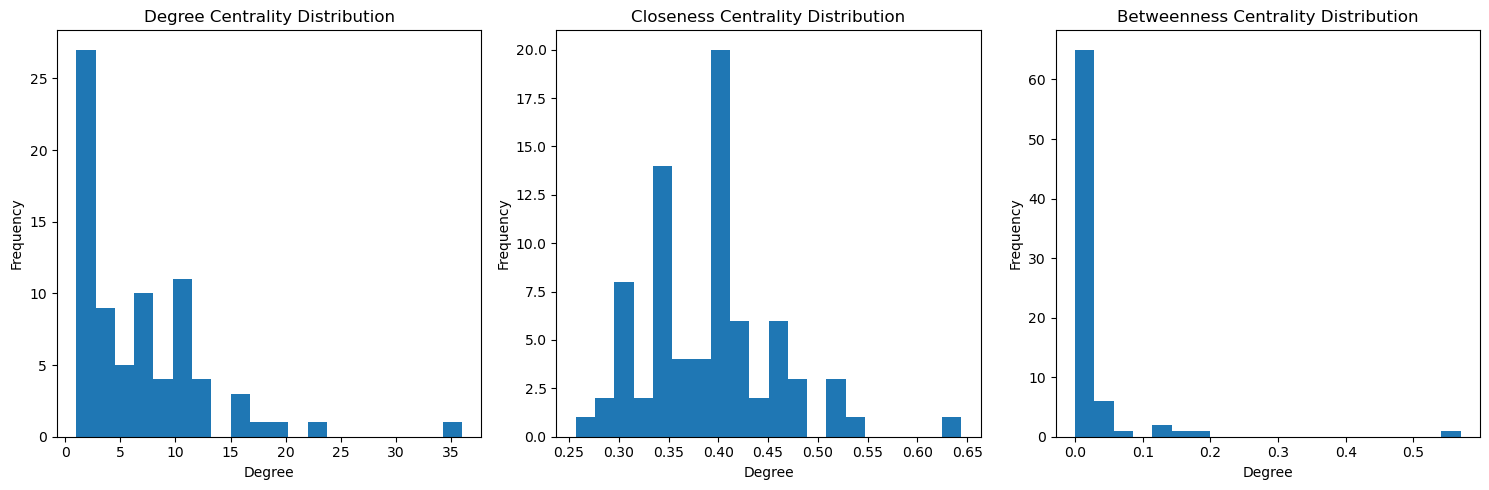

In [10]:
# Create a new graph with binary representation
binary_G = nx.Graph()
binary_G.add_nodes_from(G.nodes())
for u, v, data in G.edges(data=True):
    binary_G.add_edge(u, v, weight=1)  # Set weight to 1 for all edges

# Create the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(binary_G).toarray()

# Save the adjacency matrix to a file
np.savetxt("binary_adjacency_matrix.txt", adjacency_matrix, fmt="%d")

print("Binary adjacency matrix saved to binary_adjacency_matrix.txt")


# Steps 2-7

print("Step 2")
diameter = nx.diameter(binary_G)
print(f"    Diameter: {diameter}")
global_clustering_coefficient = nx.average_clustering(binary_G)
print(f"    Global Clustering Coefficient: {global_clustering_coefficient}")
average_distance = nx.average_shortest_path_length(binary_G)
print(f"    Average Distance: {average_distance}")
smallest_component = len(min(nx.connected_components(binary_G), key=len))
print(f"    Smallest Component: {smallest_component}")
largest_component = len(max(nx.connected_components(binary_G), key=len))
print(f"    Largest Component: {largest_component}")

print("Step 3")

degree_centrality = nx.degree_centrality(binary_G)
closeness_centrality = nx.closeness_centrality(binary_G)
betweenness_centrality = nx.betweenness_centrality(binary_G)

degree_top3 = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
closeness_top3 = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
betweenness_top3 = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print(f"    Top 3 Degree Centrality: {degree_top3}")
print(f"    Top 3 Closeness Centrality: {closeness_top3}")
print(f"    Top 3 Betweenness Centrality: {betweenness_top3}")

degree_sequence = sorted([d for n, d in binary_G.degree()], reverse=True)
closeness_sequence = list(closeness_centrality.values())
betweenness_sequence = list(betweenness_centrality.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot degree centrality distribution
axs[0].hist(degree_sequence, bins=20)
axs[0].set_title("Degree Centrality Distribution")
axs[0].set_xlabel("Degree")
axs[0].set_ylabel("Frequency")
# Plot closeness centrality distribution
axs[1].hist(closeness_sequence, bins=20)
axs[1].set_title("Closeness Centrality Distribution")
axs[1].set_xlabel("Degree")
axs[1].set_ylabel("Frequency")
# Plot betweenness centrality distribution
axs[2].hist(betweenness_sequence, bins=20)
axs[2].set_title("Betweenness Centrality Distribution")
axs[2].set_xlabel("Degree")
axs[2].set_ylabel("Frequency")

print("Step 4")

plt.tight_layout()
plt.show()


9. We want to approximate the real graph in 1) by a random graph, by looking into the order of magnitude of average clustering coefficient and diameter, comment whether ErdösRenyi random graph or small-world model is more suitable to approximate this real graph. Write a script that  calculates the average clustering coefficient and diameter for various values of probabilities p from 0.1 till 0.9, and identify the value of p that best matches with average clustering coefficient and diameter of the real graph.

In [12]:
def calculate_metrics(graph):
    avg_clustering_coefficient = nx.average_clustering(graph)
    diameter = nx.diameter(graph)
    return avg_clustering_coefficient, diameter
probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
er_lowest_difference = float('inf')
er_best_probability = None
er_best_avg_cc_difference = None
er_best_diameter_difference = None
G_avg_cc, G_diameter = calculate_metrics(G)
for p in probabilities:
    er_graph = nx.erdos_renyi_graph(len(G), p)
    avg_cc, diameter = calculate_metrics(er_graph)
    avg_cc_difference = abs(avg_cc - G_avg_cc)
    diameter_difference = abs(diameter - G_diameter)
    total_difference = avg_cc_difference + diameter_difference
    if total_difference < er_lowest_difference:
        er_lowest_difference = total_difference
        er_best_probability = p
        er_best_avg_cc_difference = avg_cc_difference
        er_best_diameter_difference = diameter_difference
print(f"Best match value: {er_best_probability}")
print(f"Lowest difference: {er_lowest_difference}")
print(f"Best average clustering coefficient difference: {er_best_avg_cc_difference}")
print(f"Best diameter difference: {er_best_diameter_difference}")

sw_lowest_difference = float('inf')
sw_best_probability = None
sw_best_avg_cc_difference = None
sw_best_diameter_difference = None
for p in probabilities:
    sw_graph = nx.watts_strogatz_graph(len(G), 4, p)
    avg_cc, diameter = calculate_metrics(sw_graph)
    avg_cc_difference = abs(avg_cc - G_avg_cc)
    diameter_difference = abs(diameter - G_diameter)
    total_difference = avg_cc_difference + diameter_difference
    if total_difference < sw_lowest_difference:
        sw_lowest_difference = total_difference
        sw_best_probability = p
        sw_best_avg_cc_difference = avg_cc_difference
        sw_best_diameter_difference = diameter_difference
print(f"Best match value: {sw_best_probability}")
print(f"Lowest difference: {sw_lowest_difference}")
print(f"Best average clustering coefficient difference: {sw_best_avg_cc_difference}")
print(f"Best diameter difference: {sw_best_diameter_difference}")

Best match value: 0.1
Lowest difference: 1.4691030491450658
Best average clustering coefficient difference: 0.46910304914506584
Best diameter difference: 1
Best match value: 0.9
Lowest difference: 0.5082635279159342
Best average clustering coefficient difference: 0.5082635279159342
Best diameter difference: 0
